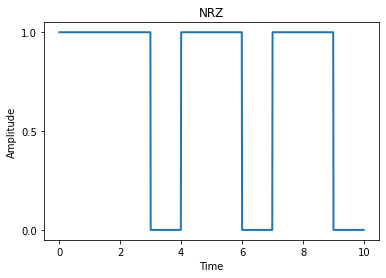

In [7]:
# NRZ conversion
import numpy as np
import matplotlib.pyplot as plt

data = "1110110110"
x = np.arange(0, len(data), 0.01)
y = np.empty(0)
for bit in data:
    if bit == '0':
        y = np.concatenate((y, np.zeros(100)))
    elif bit == '1':
        y = np.concatenate((y, np.ones(100)))
plt.plot(x, y, linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('NRZ')
plt.yticks([0, 0.5, 1])
plt.show()


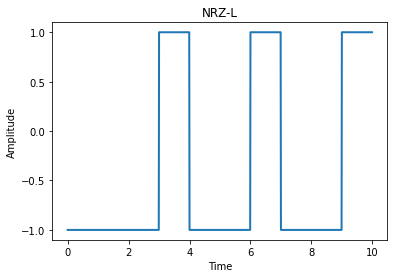

In [6]:
# NZRL conversion
data = "1110110110"
x = np.arange(0, len(data), 0.01)
y = np.empty(0)
for bit in data:
    if bit == '0':
        y = np.concatenate((y, np.ones(100)*(1)))
    elif bit == '1':
        y = np.concatenate((y, np.ones(100)*(-1)))
plt.plot(x, y, linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('NRZ-L')
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.show()


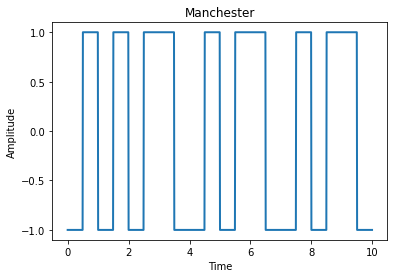

In [9]:
# Manchester conversion
data = "1110110110"
x = np.arange(0, len(data), 0.01)
y = np.empty(0)
for bit in data:
    if bit == '0':
        y = np.concatenate((y, np.ones(50)*(1)))
        y = np.concatenate((y, np.ones(50)*(-1)))
    elif bit == '1':
        y = np.concatenate((y, np.ones(50)*(-1)))
        y = np.concatenate((y, np.ones(50)*(1)))
plt.plot(x, y, linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Manchester')
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.show()


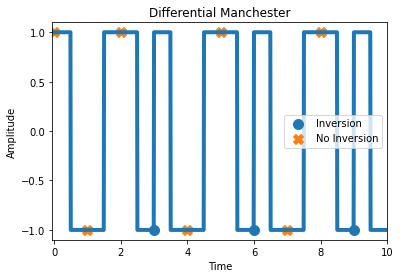

In [11]:
# Differential Manchester conversion
data = "1110110110"
x = np.arange(-1, len(data), 0.01)
y = np.empty(0)
inversion_x = []
inversion_y = []
no_inversion_x = []
no_inversion_y = []
y = np.concatenate((y, np.ones(50)*(-1)))
y = np.concatenate((y, np.ones(50)*(1)))
prev_state = 1
i = -1
for bit in data:
    i += 1
    if bit == '0' and prev_state == -1:
        y = np.concatenate((y, np.ones(50)*(1)))
        y = np.concatenate((y, np.ones(50)*(-1)))
        inversion_x.append(i)
        inversion_y.append(-1)
    elif bit == '0' and prev_state == 1:
        y = np.concatenate((y, np.ones(50)*(-1)))
        y = np.concatenate((y, np.ones(50)*(1)))
        inversion_x.append(i)
        inversion_y.append(1)
    elif bit == '1' and prev_state == -1:
        y = np.concatenate((y, np.ones(50)*(-1)))
        y = np.concatenate((y, np.ones(50)*(1)))
        prev_state = 1
        no_inversion_x.append(i)
        no_inversion_y.append(-1)
    elif bit == '1' and prev_state == 1:
        y = np.concatenate((y, np.ones(50)*(1)))
        y = np.concatenate((y, np.ones(50)*(-1)))
        no_inversion_x.append(i)
        no_inversion_y.append(1)
        prev_state = -1
plt.plot(x, y, linewidth=4)
p1 = plt.scatter(inversion_x, inversion_y, marker="o", s=10**2)
p2 = plt.scatter(no_inversion_x, no_inversion_y, marker="X", s=10**2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Differential Manchester')
plt.xlim([-.05, len(data)])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.legend([p1, p2], ["Inversion", "No Inversion"])
plt.show()
